In [10]:
import os
import scipy.io
from matplotlib import pyplot as plt
from PIL import Image
from scipy.linalg import logm
import numpy as np
import pandas as pd
from PyEMD import EMD,CEEMDAN,Visualisation,EEMD
import math
from pandas import Series
from scipy.signal import argrelextrema
from IPython.display import clear_output
from vmdpy import VMD

(80, 4096)


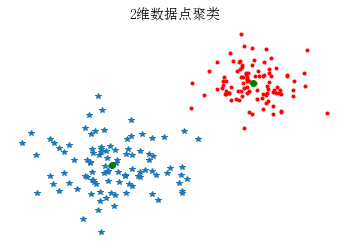

In [128]:


import pickle
from scipy import *
from pylab import *
from PIL import Image
from scipy.cluster.vq import *

 
# Uses sparse pca codepath
path ='E:\\CAET\\有车图片\\' 
names = os.listdir(path)
# print(names)

# len(names)
f = []
for q in range(len(names)):
    n = names[q]
    files = os.path.join(path, n)
#     print(files)
    imlist = Image.open(files)    
    im = np.asarray(imlist)
    im = im.reshape(1,-1)[0].tolist()
#     print(len(im))
    f.append(im)
#     f = f.reshape(-1,len(names))
    
#     features = vstack((f,im))
f = np.array(f)
print(f.shape)


centroids, variance = kmeans(features, 2)
code, distance = vq(features, centroids)
figure()
ndx = where(code == 0)[0]
plot(features[ndx, 0], features[ndx, 1], '*')
ndx = where(code == 1)[0]
plot(features[ndx, 0], features[ndx, 1], 'r.')
plot(centroids[:, 0], centroids[:, 1], 'go')
 
title(u'2维数据点聚类', fontproperties=font)
axis('off')
show()
# kmeans = KMeans(n_clusters=2)
# input_x=f[:,1:5]
# kmeans = KMeans(n_clusters=6,max_iter=50000000)
# kmeans.fit(input_x)
# label_pred=kmeans.labels_
# #绘制k-means结果
# x0 = input_x[label_pred == 0]
# x1 = input_x[label_pred == 1]
# x2 = input_x[label_pred == 2]
# x3 = input_x[label_pred == 3]
# x4 = input_x[label_pred == 4]
# x5 = input_x[label_pred == 5]
# plt.figure(2)
# plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
# plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
# plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
# plt.scatter(x3[:, 0], x3[:, 1], c = "black", marker='p', label='label3')
# plt.scatter(x4[:, 0], x4[:, 1], c = "green", marker='d', label='label4')
# plt.scatter(x5[:, 0], x5[:, 1], c = "k", marker='<', label='label5')
# plt.xlabel('petal length')
# plt.ylabel('petal width')
# plt.legend(loc=2)
# plt.show()

In [ ]:
# 获取图像列表和他们的尺寸
im = array(Image.open(imlist[0]))  # open one image to get the size
m, n = im.shape[:2]  # get the size of the images
imnbr = len(imlist)  # get the number of images
print "The number of images is %d" % imnbr
 
# Create matrix to store all flattened images
immatrix = array([array(Image.open(imname)).flatten() for imname in imlist], 'f')
 
# PCA降维
V, S, immean = pca.pca(immatrix)
 
# 保存均值和主成分
#f = open('./a_pca_modes.pkl', 'wb')
f = open('./a_pca_modes.pkl', 'wb')
pickle.dump(immean,f)
pickle.dump(V,f)
f.close()
 
 
# get list of images
imlist = imtools.get_imlist('../data/selectedfontimages/a_selected_thumbs/')
imnbr = len(imlist)
 
# load model file
with open('../data/selectedfontimages/a_pca_modes.pkl','rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)
# create matrix to store all flattened images
immatrix = array([array(Image.open(im)).flatten() for im in imlist],'f')
 
# project on the 40 first PCs
immean = immean.flatten()
projected = array([dot(V[:40],immatrix[i]-immean) for i in range(imnbr)])
 
# k-means
projected = whiten(projected)
centroids,distortion = kmeans(projected,4)
code,distance = vq(projected,centroids)
 
# plot clusters
for k in range(4):
    ind = where(code==k)[0]
    figure()
    gray()
    for i in range(minimum(len(ind),40)):
        subplot(4,10,i+1)
        imshow(immatrix[ind[i]].reshape((25,25)))
        axis('off')
show()

(100, 2)
(200, 2)


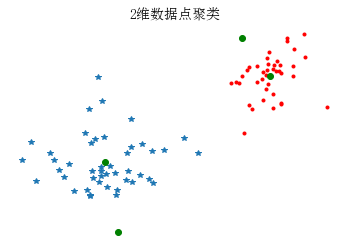

In [62]:

from pylab import *
from scipy.cluster.vq import *
 
# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)
 
class1 = 1.5 * randn(100, 2)
class2 = randn(100, 2) + array([5, 5])
print(class1.shape)
features = vstack((class1, class2))
# print(features.shape)
centroids, variance = kmeans(features, 4)
code, distance = vq(features, centroids)
figure()
ndx = where(code == 0)[0]
plot(features[ndx, 0], features[ndx, 1], '*')
ndx = where(code == 1)[0]
plot(features[ndx, 0], features[ndx, 1], 'r.')
plot(centroids[:, 0], centroids[:, 1], 'go')
 
title(u'2维数据点聚类', fontproperties=font)
axis('off')
show()

In [76]:

import os, codecs
import shutil
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
 
def get_file_name(path):
    '''''
    Args: path to list;  Returns: path with filenames
    '''
    filenames = os.listdir(path)
    path_filenames = []
    filename_list = []
    for file in filenames:
        if not file.startswith('.'):
            path_filenames.append(os.path.join(path, file))
            filename_list.append(file)
 
    return path_filenames
 
 
def knn_detect(file_list, cluster_nums, randomState=True):
    features = []
    files = file_list
 
    # sift = cv2.xfeatures2d.SIFT_create()
    for file in files:
        # print(file)
        img = cv2.imread(file)
        """
        采用插值的方式进行resize images size,
        calculate each image hist feature,
        normalize
        """
#         img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC)
 
        #第一种特征提取方法
        # nhist = cv2.calcHist([img], [0,1], None, [64,64], [0.0, 255.0,0.0, 255.0])
        # # 归一化，分为范围归一化和值归一化，如下是把归一化到0-255之间，归一化数学函数选择的是
        # # NORM_MINMAX ，flatten()是将得到的数组转换为一维数组，不能之间用于list
        # nhist = cv2.normalize(nhist, nhist, 0, 255, cv2.NORM_MINMAX).flatten()
        # features.append(nhist)
 
        #第二种特征提取方法，转为灰度图，转为一维数组
#         img1=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img3=img.flatten()
        features.append(img3)
 
 
    """
    变成一个数组
    """
    input_x = np.array(features)
    print('数据维数',input_x.shape)
    input_x=input_x[:,1:5]
    plt.figure(1)
    plt.scatter(input_x[:, 0], input_x[:, 1], c = "red", marker='o', label='see')
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    # 设置图例的位置
    plt.legend(loc=2)
    plt.show()
 
    """
    input required k ,build an object of KMeans; then cluster
    """
    kmeans = KMeans(n_clusters=cluster_nums,max_iter=50000000)
    kmeans.fit(input_x)
    label_pred=kmeans.labels_
    #绘制k-means结果
    x0 = input_x[label_pred == 0]
    x1 = input_x[label_pred == 1]
    x2 = input_x[label_pred == 2]
    x3 = input_x[label_pred == 3]
    x4 = input_x[label_pred == 4]
    x5 = input_x[label_pred == 5]
    plt.figure(2)
    plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
    plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
    plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
    plt.scatter(x3[:, 0], x3[:, 1], c = "black", marker='p', label='label3')
    plt.scatter(x4[:, 0], x4[:, 1], c = "green", marker='d', label='label4')
    plt.scatter(x5[:, 0], x5[:, 1], c = "k", marker='<', label='label5')
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(loc=2)
    plt.show()
 
    mark=['or','ob','og','ok','^r','+r','sr','dr','<r','pr']
    # plt.plot(kmeans.cluster_centers_)
    # plt.plot(kmeans.labels_)
    # plt.show()
    return kmeans.labels_, kmeans.cluster_centers_
 
 
def res_fit(filenames, labels):
    # files = [file.split('/')[-1] for file in filenames]
    files=[]
    for file in filenames:
        filepath,fullflname=os.path.split(file)
        fname,ext=os.path.splitext(fullflname)
        files.append(fname)
    # file1 = [file2.split('.') for file2 in files]
    # for i in range(len(labels)):
    #     shutil.copy("./images2/"+files[i], "pic/"+str(labels[i])+files[i])
    return dict(zip(files, labels))
 
 
def save(path, filename, data):
    file = os.path.join(path, filename)
    with codecs.open(file, 'w', encoding='utf-8') as fw:
        for f, l in data.items():
            fw.write("{}\t{}\n".format(f, l))
 
def painter(labels,cluster_centers,result, input_x):
    dataSet = []
    fileIn = open('./cluster_3.txt')
    for line in fileIn.readlines():
        lineArr = line.strip().split('\t')
        dataSet.append([float(lineArr[0]), float(lineArr[1])])
 
    num=len(dataSet)
    mark=['or','ob','og','ok','^r','+r','sr','dr','<r','pr']
    for i in range(num):
        plt.plot(dataSet[i][0],dataSet[i][1],mark[int(dataSet[i][1])])
    plt.show()
 
def main():
    path_filenames = get_file_name("E:\\CAET\\有车图片\\")
 
    labels, cluster_centers = knn_detect(path_filenames,6)
 
    res_dict = res_fit(path_filenames, labels)
    # save('./', 'knn_res.txt', res_dict)
    # save('./','cluster.txt',res_dict)
#     save('./','cluster_3.txt',res_dict)
    # painter(labels,cluster_centers,result,input_x)
 
 
if __name__ == "__main__":

    main()

AttributeError: 'NoneType' object has no attribute 'flatten'